# DBSCAN(Density based spatial clustering application with noise)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('D:\Data Scientist\Clustering\Density based clustering\DBscan_clustering_codes\wine_data.csv')

In [3]:
df.head()

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OD_read  178 non-null    float64
 1   Proline  178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


In [5]:
# Duplicates

duplicate = df.duplicated()
duplicate.sum()

1

In [6]:
df = df.drop_duplicates()

In [7]:
duplicate = df.duplicated()
duplicate.sum()

0

In [8]:
# missing values

df.isna().sum()

OD_read    0
Proline    0
dtype: int64

OD_read       Axes(0.125,0.11;0.352273x0.77)
Proline    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

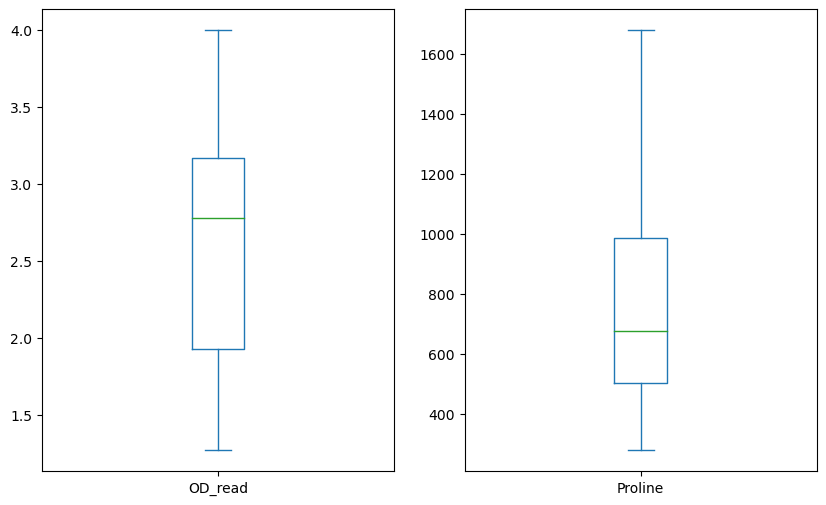

In [9]:
# outlier using box plot

df.plot(kind = 'box',subplots = True, sharey = False, figsize = (10,6))

Text(0, 0.5, 'Proline')

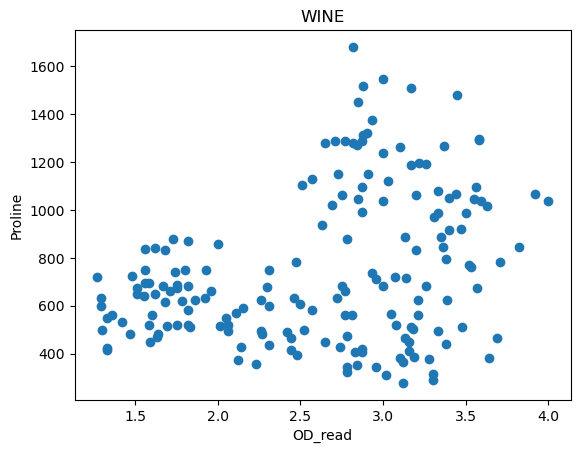

In [10]:
# sactter plot

plt.scatter(x ='OD_read', y ='Proline',data = df )
plt.title('WINE')
plt.xlabel('OD_read')
plt.ylabel('Proline')

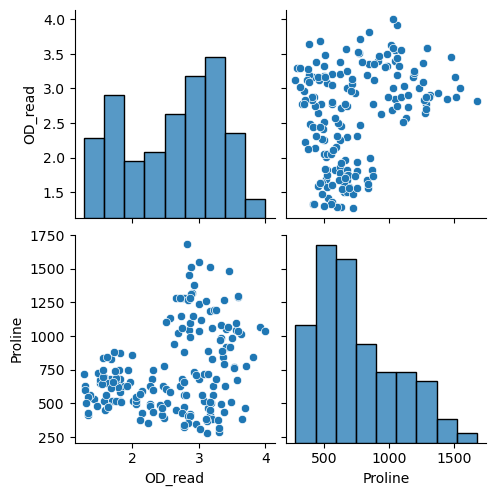

In [11]:
sns.pairplot(df)

In [13]:
# check the distribution

import scipy.stats as stats
import pylab

((array([-2.65987973, -2.34607723, -2.16682294, -2.03825398, -1.93654717,
         -1.8516444 , -1.7783092 , -1.71345281, -1.65509391, -1.60188234,
         -1.55285486, -1.50729915, -1.46467292, -1.42455333, -1.38660402,
         -1.35055282, -1.31617622, -1.28328831, -1.25173273, -1.22137663,
         -1.19210613, -1.16382284, -1.13644112, -1.10988595, -1.08409121,
         -1.05899833, -1.03455512, -1.0107149 , -0.98743571, -0.96467969,
         -0.94241258, -0.9206032 , -0.89922315, -0.87824644, -0.85764924,
         -0.83740962, -0.81750737, -0.79792378, -0.77864153, -0.75964454,
         -0.74091782, -0.7224474 , -0.70422023, -0.68622408, -0.66844748,
         -0.65087965, -0.63351045, -0.6163303 , -0.59933018, -0.58250154,
         -0.56583627, -0.5493267 , -0.53296551, -0.51674578, -0.50066087,
         -0.48470447, -0.46887053, -0.45315329, -0.43754721, -0.42204698,
         -0.4066475 , -0.39134385, -0.37613132, -0.36100534, -0.34596152,
         -0.33099559, -0.31610344, -0.

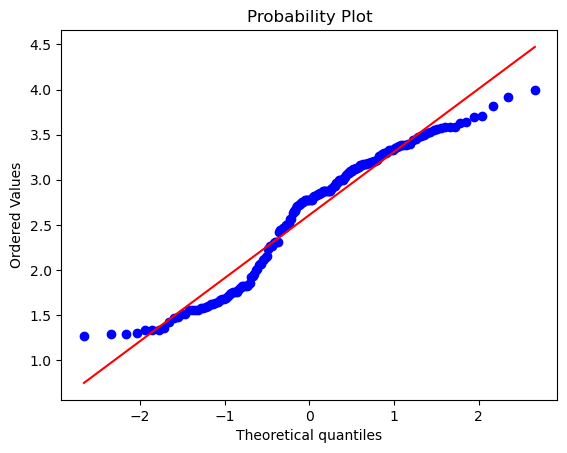

In [14]:
stats.probplot(df['OD_read'],dist = 'norm',plot = pylab)

((array([-2.65987973, -2.34607723, -2.16682294, -2.03825398, -1.93654717,
         -1.8516444 , -1.7783092 , -1.71345281, -1.65509391, -1.60188234,
         -1.55285486, -1.50729915, -1.46467292, -1.42455333, -1.38660402,
         -1.35055282, -1.31617622, -1.28328831, -1.25173273, -1.22137663,
         -1.19210613, -1.16382284, -1.13644112, -1.10988595, -1.08409121,
         -1.05899833, -1.03455512, -1.0107149 , -0.98743571, -0.96467969,
         -0.94241258, -0.9206032 , -0.89922315, -0.87824644, -0.85764924,
         -0.83740962, -0.81750737, -0.79792378, -0.77864153, -0.75964454,
         -0.74091782, -0.7224474 , -0.70422023, -0.68622408, -0.66844748,
         -0.65087965, -0.63351045, -0.6163303 , -0.59933018, -0.58250154,
         -0.56583627, -0.5493267 , -0.53296551, -0.51674578, -0.50066087,
         -0.48470447, -0.46887053, -0.45315329, -0.43754721, -0.42204698,
         -0.4066475 , -0.39134385, -0.37613132, -0.36100534, -0.34596152,
         -0.33099559, -0.31610344, -0.

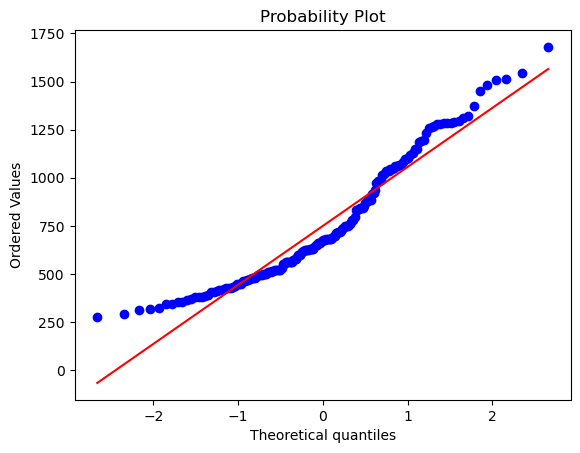

In [15]:
stats.probplot(df['Proline'],dist = 'norm', plot = pylab)

# Model Building using DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [26]:
# Generate clusters using DBSCAN

db_param_options = [[20, 5], [25, 5], [30, 5], [25, 7], [35, 7], [40, 5]]

for ep, min_sample in db_param_options:
    db = DBSCAN(eps = ep, min_samples = min_sample)
    db_clusters = db.fit_predict(df)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(df, db_clusters))

Eps:  20 Min Samples:  5
DBSCAN Clustering:  0.39874666620956795
Eps:  25 Min Samples:  5
DBSCAN Clustering:  0.35314558258398593
Eps:  30 Min Samples:  5
DBSCAN Clustering:  0.4385447900003894
Eps:  25 Min Samples:  7
DBSCAN Clustering:  0.2656897340492712
Eps:  35 Min Samples:  7
DBSCAN Clustering:  0.46097357383412935
Eps:  40 Min Samples:  5
DBSCAN Clustering:  0.5746293909096545


In [27]:
db = DBSCAN(eps = 40, min_samples = 5)
db_clusters = db.fit_predict(df)

In [28]:
db.labels_

array([ 0,  0,  0, -1,  1, -1,  2,  2,  0,  0, -1,  2,  2,  0, -1,  2,  2,
        0, -1,  1,  1,  1,  0,  0,  1,  1,  0,  2,  1,  0,  2, -1,  0,  2,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  2,  0,
        2,  0, -1,  0,  0,  0,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [29]:
clust_db = pd.Series(db.labels_)

In [30]:
df['Cluster'] = clust_db

In [32]:
df.head()

,OD_read,Proline,Cluster
0,3.92,1065.0,0.0
1,3.40,1050.0,0.0
2,3.17,1185.0,0.0
3,3.45,1480.0,-1.0
4,2.93,735.0,1.0


In [37]:
df.iloc[ : , 0:2].groupby(df.Cluster).mean()

,OD_read,Proline
Cluster,,
-1.0,3.014286,1508.142857
0.0,3.172143,1067.571429
1.0,2.432266,585.414062
2.0,3.005385,1281.538462


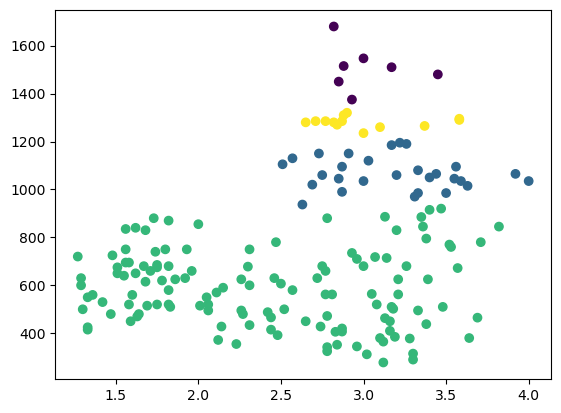

In [39]:
plt.scatter(x = 'OD_read', y = 'Proline', c= clust_db, data = df)# n_clusters = 4